# Absatzprognose 

## 0. Setup

In [133]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from pathlib import Path # Import für professionelles Pfad-Management

In [134]:
# Konfiguration

# Pfad
DATA_FOLDER = "Data"
FILE_NAME = "Absatz_und_Werbeausgaben_2012_bis_2022.xlsx"
DATA_FILE = Path(DATA_FOLDER) / FILE_NAME

# Parameter
RANDOM_STATE = 42 # Für reproduzierbare Ergebnisse

# Matplotlib-Plots direkt im Notebook anzeigen und Theme setzen
%matplotlib inline
sns.set_theme(style="whitegrid")

## 1. Daten Laden 

In [135]:
try:
    df = pd.read_excel(DATA_FILE)
    print(f"Daten erfolgreich geladen: \n{len(df)} Datensätze gefunden.")
except FileNotFoundError:
    print(f"FEHLER: Die Datei '{DATA_FILE}' wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
    df = None

Daten erfolgreich geladen: 
132 Datensätze gefunden.


## 2. Zähler hinzufügen

In [136]:
# Add a counter column
df['Counter'] = df.index + 1 # +1 to start counting from 1 instead of 0
print(f"Counter-Spalten hinzugefügt: \n{df.columns}")

Counter-Spalten hinzugefügt: 
Index(['Monat', 'Absatz [Einheiten]', 'Werbeausgaben [€]', 'Counter'], dtype='object')


## 3. Analyse mit Scatter Plot

Text(0, 0.5, 'Counter')

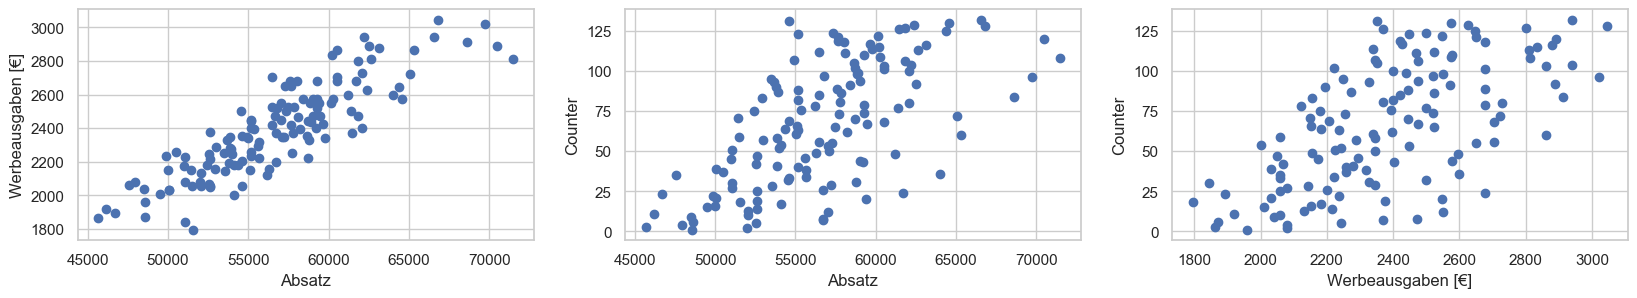

In [137]:
# Plots 
plt.figure(figsize=(20, 3))

plt.subplot(131)
plt.scatter('Absatz [Einheiten]' ,'Werbeausgaben [€]', data=df)
plt.xlabel('Absatz')
plt.ylabel('Werbeausgaben [€]')

plt.subplot(132)
plt.scatter('Absatz [Einheiten]' ,'Counter', data=df)
plt.xlabel('Absatz')
plt.ylabel('Counter')

plt.subplot(133)
plt.scatter('Werbeausgaben [€]' ,'Counter', data=df)
plt.xlabel('Werbeausgaben [€]')
plt.ylabel('Counter')

Die Werbeausgaben sind hier die unabhängige Variable. 

In [138]:
X = df[['Werbeausgaben [€]']]  
y = df['Absatz [Einheiten]'] 

## 4. Spalte entfernen 

In [139]:
df = df.drop(columns=['Monat'])
print(f"Monats-Spalte entfernt: \n{df.columns}")

Monats-Spalte entfernt: 
Index(['Absatz [Einheiten]', 'Werbeausgaben [€]', 'Counter'], dtype='object')


## 5. Training 

In [140]:
# Trainieren
model = LinearRegression()
model.fit(X, y)

# y = mx + c
slope = model.coef_[0]
intercept = model.intercept_

print("Steigung (Koeffizient):", slope)
print("Achsenabschnitt (Intercept):", intercept)

Steigung (Koeffizient): 15.916048952060294
Achsenabschnitt (Intercept): 18685.005012419206


## 6. Vorhersagen 

In [141]:
# Vorhersage 
y_pred = model.predict(X)

# Vergleich
vergleich = df.copy()
vergleich['Vorhersage'] = y_pred
print(f"Vergleich: \n{vergleich[['Vorhersage', 'Absatz [Einheiten]']].head()}")

Vergleich: 
     Vorhersage  Absatz [Einheiten]
0  49880.460958               48548
1  51774.470784               52006
2  48320.688161               45671
3  51790.386833               47925
4  54400.618861               52523


## 7. Darstellen 

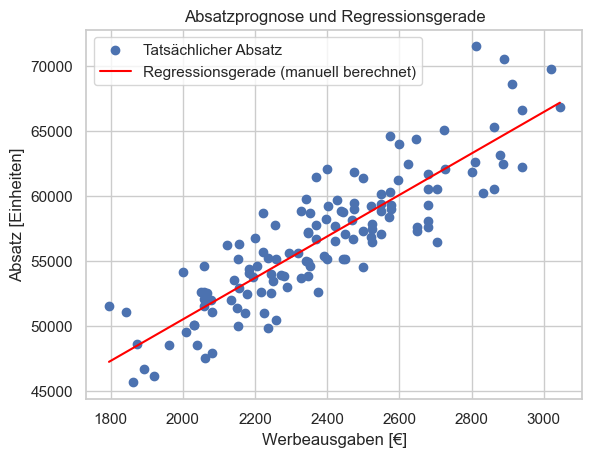

In [142]:
# Gerade erstellen 
x_values = np.array([df['Werbeausgaben [€]'].min(), df['Werbeausgaben [€]'].max()])         # Wertebereich festlegen 
y_values = slope * x_values + intercept                                                     # Funktion erstellen 

# Visualisierung 
plt.scatter('Werbeausgaben [€]', 'Absatz [Einheiten]', data=df, label='Tatsächlicher Absatz')       # Originaldaten
plt.plot(x_values, y_values, color='red', label='Regressionsgerade (manuell berechnet)')            # Regressionsgerade

plt.title('Absatzprognose und Regressionsgerade')
plt.xlabel('Werbeausgaben [€]')
plt.ylabel('Absatz [Einheiten]')
plt.legend()
plt.show()

## 8. Kennzahlen 

In [143]:
# R-Quadrat (R²)
r2 = r2_score(y, y_pred)
print(f"R-Quadrat (R²): {r2:.4f}")

# Berechne das angepasste R-Quadrat (Adjusted R²)
n = len(y) # Anzahl der Beobachtungen
p = X.shape[1] # Anzahl der Prädiktoren

# Sicherstellen, dass n - p - 1 nicht Null oder negativ ist
if n - p - 1 > 0:
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
    print(f"Angepasstes R-Quadrat (Adjusted R²): {adjusted_r2:.4f}")
else:
    print("Angepasstes R-Quadrat (Adjusted R²): Nicht berechenbar (zu wenige Daten oder zu viele Prädiktoren)")

# Mittlerer Absoluter Fehler (MAE)
mae = mean_absolute_error(y, y_pred)
print(f"Mittlerer Absoluter Fehler (MAE): {mae:.2f}")

# Mittlerer Quadratischer Fehler (MSE)
# Der Durchschnitt der quadrierten Differenzen. Größere Fehler werden stärker bestraft.
mse = mean_squared_error(y, y_pred)
print(f"Mittlerer Quadratischer Fehler (MSE): {mse:.2f}")

# Wurzel des Mittleren Quadratischen Fehlers (RMSE)
rmse = np.sqrt(mse)
print(f"Wurzel des Mittleren Quadratischen Fehlers (RMSE): {rmse:.2f}")

R-Quadrat (R²): 0.7583
Angepasstes R-Quadrat (Adjusted R²): 0.7565
Mittlerer Absoluter Fehler (MAE): 1982.56
Mittlerer Quadratischer Fehler (MSE): 6082244.43
Wurzel des Mittleren Quadratischen Fehlers (RMSE): 2466.22


## 9. Vergleich der Vorhersage und der Echten Daten

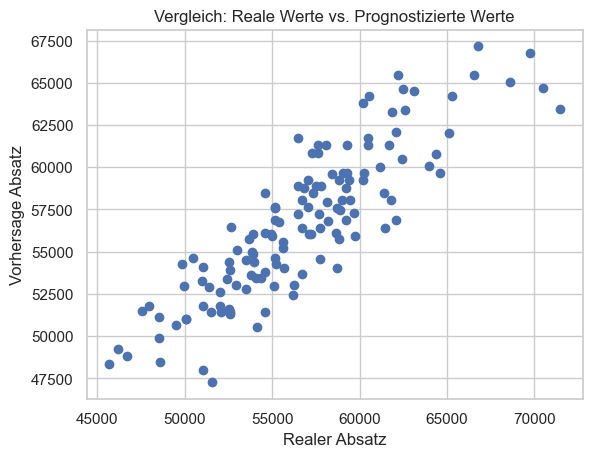

In [144]:
plt.scatter('Absatz [Einheiten]', 'Vorhersage', data=vergleich)
plt.title('Vergleich: Reale Werte vs. Prognostizierte Werte')
plt.xlabel('Realer Absatz')
plt.ylabel('Vorhersage Absatz')
plt.show()

Die Vorhersage light mit den Echten Datenpunkten sehr gut auf einer Diagonalen.

## 10. Weitere Kennzahlen für den Vergleich 

In [145]:
# Die .describe()-Methode berechnet automatisch viele nützliche statistische Kennzahlen.
statistik_vergleich = vergleich[['Absatz [Einheiten]', 'Vorhersage']].describe()

print(f"Statistischer Vergleich von realem Absatz und Prognose: \n{statistik_vergleich}")

Statistischer Vergleich von realem Absatz und Prognose: 
       Absatz [Einheiten]    Vorhersage
count          132.000000    132.000000
mean         56682.401515  56682.401515
std           5035.729096   4385.190275
min          45671.000000  47254.312881
25%          53357.000000  53429.739875
50%          56700.000000  56390.124980
75%          59384.750000  59613.124893
max          71467.000000  67149.374071
